In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Visualizations to Achieve

In [3]:
#Vertical Bar chart to compare categories

In [4]:
#Horizontal Bar Chart to rank categories

In [5]:
#Stacked Bar Chart to show part to whole

In [6]:
#Histogram to show distribution of a continuous variable

In [7]:
#Scatterplot to show correlation 

In [8]:
#Line Chart to show change

## Creating Vertical Bar Chart

In [9]:
#Created a seperate emptier Excel sheet to just highlight the boroughs
pd.read_csv(r'/Users/winsontom/Desktop/03 Scripts & Data/6.0 - Visualizations/BarChartData.csv')

,Address,Borough
0,"2 E 55th St Unit 803New York, NY 10022",Manhattan
1,Central Park Tower Penthouse-217 W 57th New Yo...,Manhattan
2,"620 Sinclair AveStaten Island, NY 10312",Staten Island
3,"2 E 55th St Unit 908W33Manhattan, NY 10022",Manhattan
4,"5 E 64th StNew York, NY 10065",Manhattan
...,...,...
4549,"222 E 80th St Apt 3AManhattan, NY 10075",Manhattan
4550,"97-40 62 Dr Unit LgRego Park, NY 11374",Queens
4551,"427 W 21st St Unit GardenNew York, NY 10011",Manhattan
4552,"91-23 Corona Ave Unit 4GElmhurst, NY 11373",Queens


In [10]:
DF = pd.read_csv(r'/Users/winsontom/Desktop/03 Scripts & Data/6.0 - Visualizations/BarChartData.csv')

In [11]:
#Comparing the amount of total listings within each borough in a vertical bar chart.
#Result will be x axis being the boroughs, y axis being the # of total listings. 

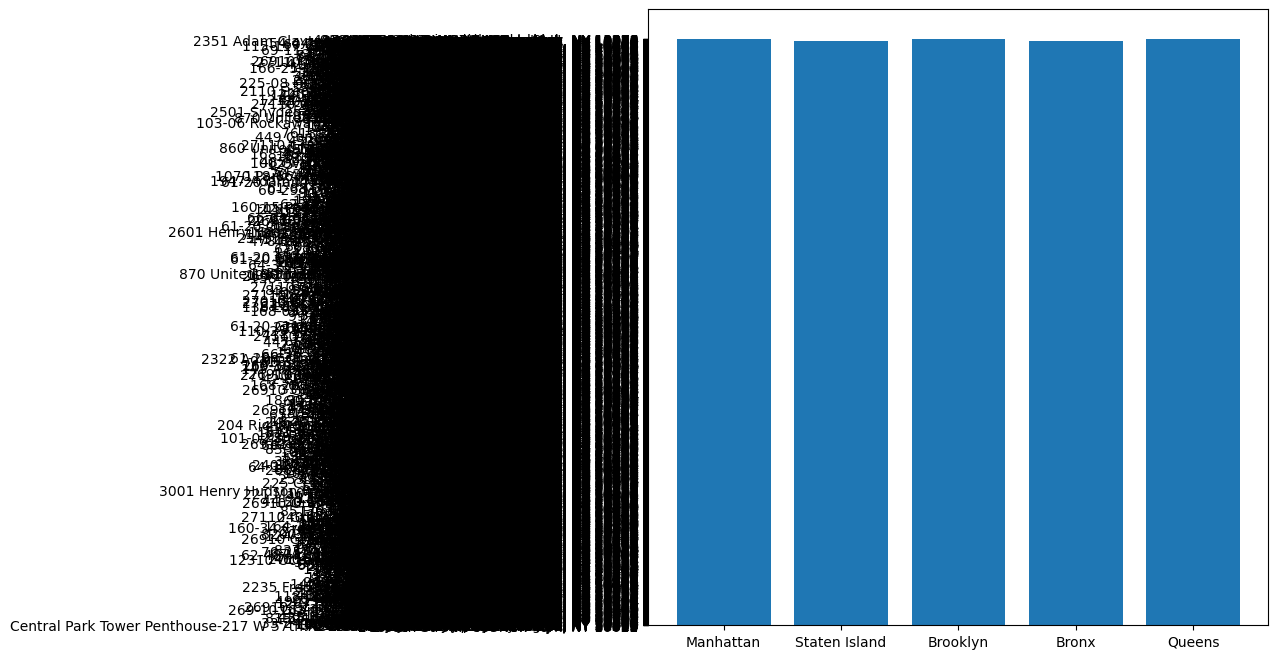

In [12]:
fig , ax = plt.subplots(figsize=(8,8))

bars = plt.bar(DF['Borough'],DF['Address'])

plt.show()

In [13]:
#Problem, we want the borough information on the x axist, but we do not want the actual addresses on the y axis,
#we want to see the count of the addresses

In [14]:
#Create a "borough_counts" which we group by the boroughs and count the number of addresses

borough_counts = DF.groupby('Borough')['Address'].count()

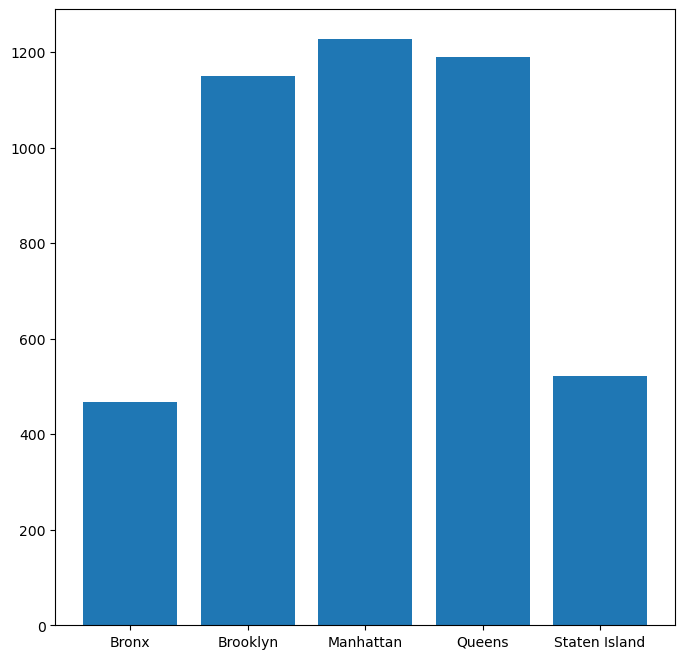

In [15]:
#Plotting most basic vertical bar chart with no additions 

fig , ax = plt.subplots(figsize=(8,8))

bars = ax.bar(borough_counts.index, borough_counts.values)

plt.show()

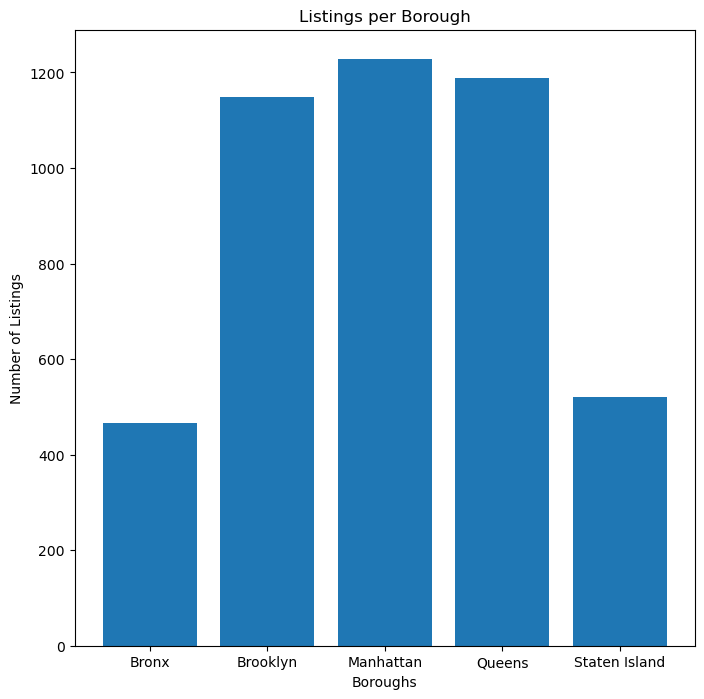

In [16]:
#Adding title, x axis label, y axis label to the basic bar chart

fig , ax = plt.subplots(figsize=(8,8))

bars = ax.bar(borough_counts.index, borough_counts.values)

ax.set_title('Listings per Borough')
ax.set_xlabel('Boroughs')
ax.set_ylabel('Number of Listings')

plt.show()

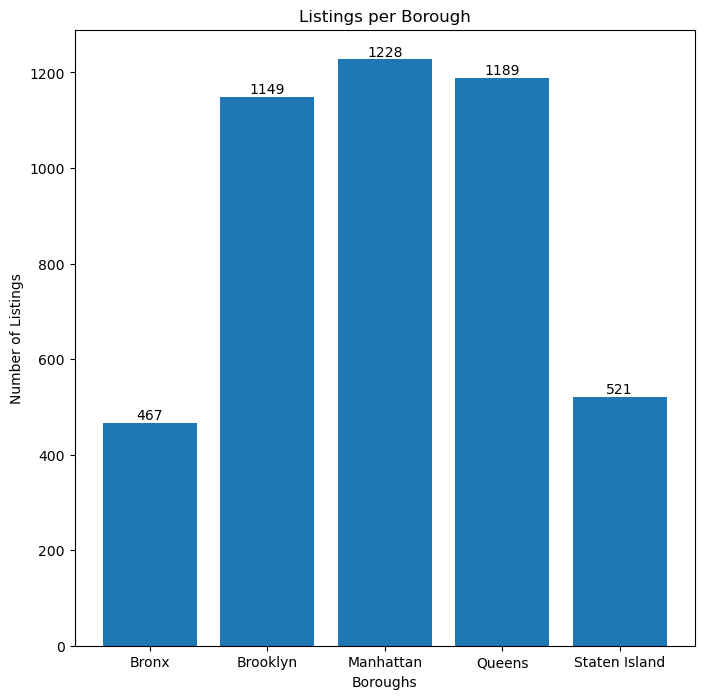

In [17]:
#Adding labels to the top to clearly define # of listings

fig , ax = plt.subplots(figsize=(8,8))

bars = ax.bar(borough_counts.index, borough_counts.values)

ax.set_title('Listings per Borough')
ax.set_xlabel('Boroughs')
ax.set_ylabel('Number of Listings')

for bar in bars:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,  
        y=height,                             
        s=f'{int(height)}',                  
        ha='center',                          
        va='bottom'                           
    )
    
plt.show()

In [18]:
#Sort borough_counts

borough_counts = borough_counts.sort_values(ascending=False)

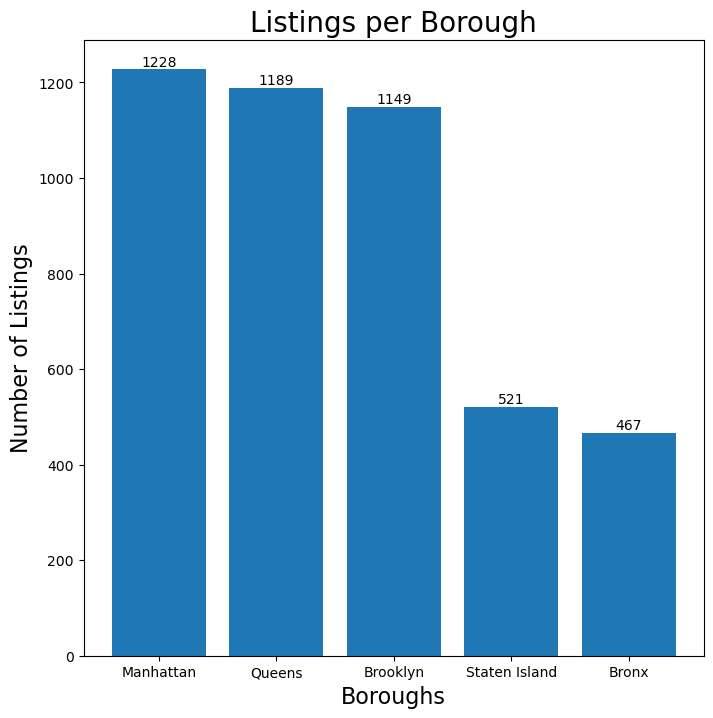

In [19]:
#Sorting vertical bar chart and increase the font size of x y and title labels

fig , ax = plt.subplots(figsize=(8,8))

bars = ax.bar(borough_counts.index, borough_counts.values)

ax.set_title('Listings per Borough', fontsize=20)
ax.set_xlabel('Boroughs', fontsize=16)
ax.set_ylabel('Number of Listings', fontsize=16)

for bar in bars:
    height = bar.get_height()
    ax.text(
        x=bar.get_x() + bar.get_width() / 2,  
        y=height,                             
        s=f'{int(height)}',                  
        ha='center',                          
        va='bottom'                           
    )
    
plt.show()

In [20]:
#The takeaway from this bar chart is that majority of listings are in Manhattan, then Queens, then Brooklyn, 
#then Staten Island, and then Bronx. These would impact what borough people may want to look at. 

## Creating Horizontal Bar Chart

In [21]:
#Created a seperate emptier Excel sheet to just highlight the boroughs
DF2 = pd.read_csv(r'/Users/winsontom/Desktop/03 Scripts & Data/6.0 - Visualizations/HorizontalBarChartA.csv')

In [22]:
#DF2 has the top 10 neighborhoods for the highest average prices
#Keeping it at 15 outputs to maintain visibility within visual

DF2

,Neighborhoods,Average Price
0,Tribeca,10561358.47
1,Chelsea,6839125.00
2,Upper East Side,6018091.82
3,Greenwich Village,5883836.96
4,Soho,5349435.48
5,Gramercy Park,4659667.63
6,Brooklyn Heights,3912979.22
7,Upper West Side,3288612.32
8,East Village,3201552.53
9,Boerum Hill,3047500.00


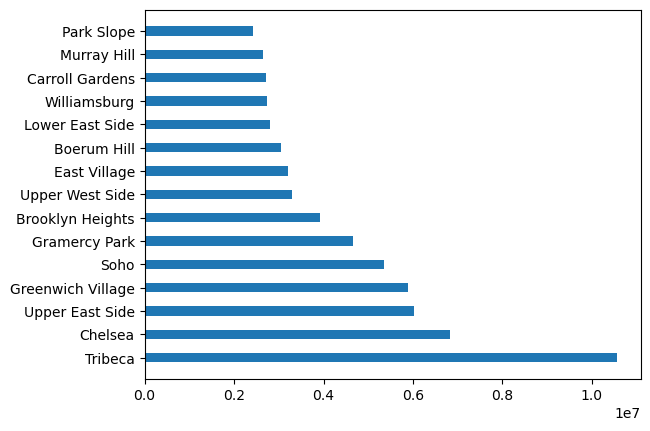

In [23]:
#Good start, creating a horizontal bar chart
#Y axis has the names of the neighborhoods clearly shown
#X axis has the $ values. 

#First fix is creating better visibility in the X axis
#Creating different $ values in the y axis

plt.barh(DF2['Neighborhoods'], DF2['Average Price '],height = 0.4)

plt.show()

In [24]:
#Creating ranges for the x axis using bins


bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000]

bin_labels = ['$0-2M', '$2M-4M', '$4M-6M', '$6M-8M', '$8M-10M', '$10M-12M']

In [25]:
DF2['Price Range'] = pd.cut(DF2['Average Price '], bins=bins, labels=bin_labels, include_lowest=True)

In [26]:
print(DF2)

        Neighborhoods  Average Price  Price Range
0             Tribeca     10561358.47    $10M-12M
1             Chelsea      6839125.00      $6M-8M
2     Upper East Side      6018091.82      $6M-8M
3   Greenwich Village      5883836.96      $4M-6M
4                Soho      5349435.48      $4M-6M
5       Gramercy Park      4659667.63      $4M-6M
6    Brooklyn Heights      3912979.22      $2M-4M
7     Upper West Side      3288612.32      $2M-4M
8        East Village      3201552.53      $2M-4M
9         Boerum Hill      3047500.00      $2M-4M
10    Lower East Side      2795000.00      $2M-4M
11       Williamsburg      2730615.31      $2M-4M
12    Carroll Gardens      2705636.36      $2M-4M
13        Murray Hill      2652422.02      $2M-4M
14         Park Slope      2427759.59      $2M-4M


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

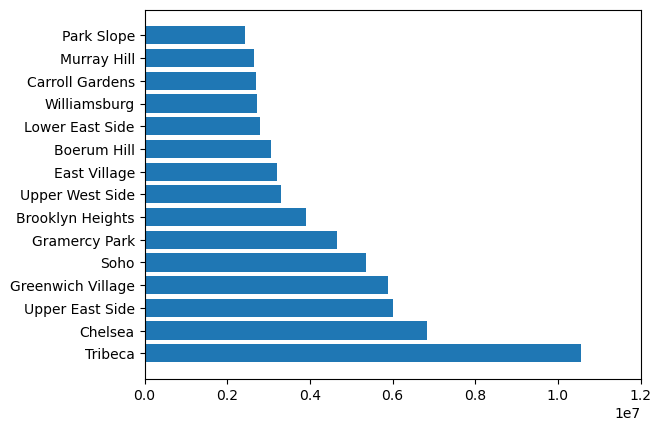

In [28]:
plt.barh(DF2['Neighborhoods'], DF2['Average Price '])

plt.xticks(bins, bin_labels)

plt.show()

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [30]:
#Ensure X axis labels comes out as currency amounts rather than 0.2, 0.4, ...

def currency(x, pos):
    return f'${x:,.0f}'

formatter = FuncFormatter(currency)

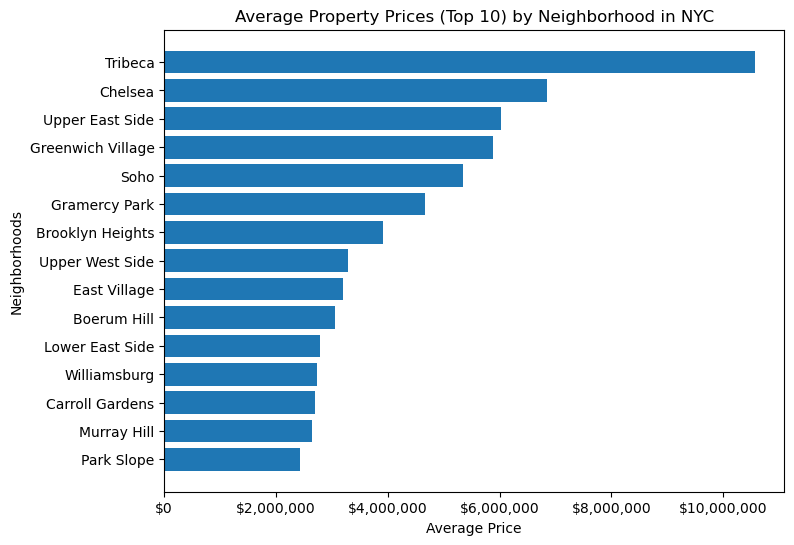

In [31]:
#Horizontal Bar Chart showing the prices of the different neighborhoods
#X Labels, Y Lables, Titles, filled out
#Sorted to where highest value at the top

plt.figure(figsize=(8, 6))

plt.barh(DF2['Neighborhoods'], DF2['Average Price '])

plt.xlabel('Average Price')
plt.ylabel('Neighborhoods')
plt.title('Average Property Prices (Top 10) by Neighborhood in NYC')
plt.gca().invert_yaxis()

plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

## Creating Stacked Bar Chart

In [ ]:
#Stacked Bar chart shows Part to Whole.
#We can re-create the listings per borough bar chart (vertical bar chart) while adding data on what portion is
#what property type

In [33]:
#Loading in new dataset to create a stacked bar chart with

DF3 = pd.read_excel(r'/Users/winsontom/Desktop/03 Scripts & Data/6.0 - Visualizations/StackedBarChartData.xlsx')

In [34]:
DF3

,Address,Property Type,Borough
0,"2 E 55th St Unit 803New York, NY 10022",Condo,Manhattan
1,Central Park Tower Penthouse-217 W 57th New Yo...,Condo,Manhattan
2,"620 Sinclair AveStaten Island, NY 10312",House,Staten Island
3,"2 E 55th St Unit 908W33Manhattan, NY 10022",Condo,Manhattan
4,"5 E 64th StNew York, NY 10065",Townhouse,Manhattan
...,...,...,...
4549,"222 E 80th St Apt 3AManhattan, NY 10075",Co-op,Manhattan
4550,"97-40 62 Dr Unit LgRego Park, NY 11374",Co-op,Queens
4551,"427 W 21st St Unit GardenNew York, NY 10011",Co-op,Manhattan
4552,"91-23 Corona Ave Unit 4GElmhurst, NY 11373",Condo,Queens


In [35]:
borough_property_counts = DF3.groupby(["Borough", "Property Type"]).size().unstack(fill_value=0)

<function matplotlib.pyplot.show(close=None, block=None)>

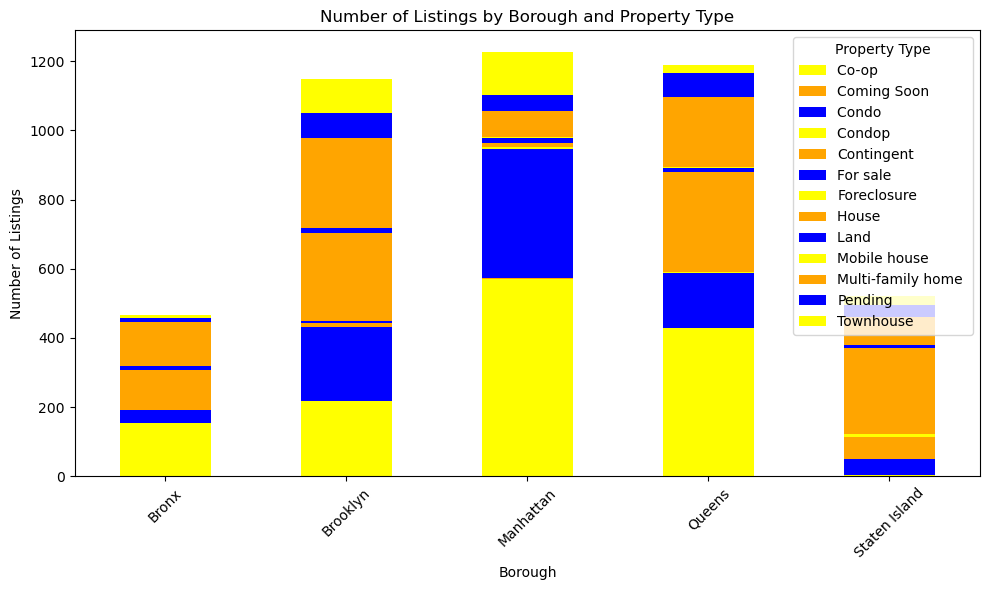

In [36]:
borough_property_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['yellow', 'orange', 'blue'])

plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Borough and Property Type')
plt.legend(title='Property Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show

In [37]:
#Base of what we want has been created, but there is alot of property types, much more than expected. 
#Ideally it is JUST  House, Land, Mobile house, Multi-family home, Townhouse, Condo. Nothing more.
#Cleaning up original data

In [47]:
DF4 = pd.read_excel(r'/Users/winsontom/Desktop/03 Scripts & Data/6.0 - Visualizations/StackedBarChartData2.0.xlsx')

In [48]:
DF4

,Address,Property Type,Borough
0,"2 E 55th St Unit 803New York, NY 10022",Condo,Manhattan
1,Central Park Tower Penthouse-217 W 57th New Yo...,Condo,Manhattan
2,"620 Sinclair AveStaten Island, NY 10312",Single Family House,Staten Island
3,"2 E 55th St Unit 908W33Manhattan, NY 10022",Condo,Manhattan
4,"5 E 64th StNew York, NY 10065",Townhouse,Manhattan
...,...,...,...
4549,"222 E 80th St Apt 3AManhattan, NY 10075",Co-Op,Manhattan
4550,"97-40 62 Dr Unit LgRego Park, NY 11374",Co-Op,Queens
4551,"427 W 21st St Unit GardenNew York, NY 10011",Co-Op,Manhattan
4552,"91-23 Corona Ave Unit 4GElmhurst, NY 11373",Condo,Queens


In [49]:
borough_property_counts2 = DF4.groupby(["Borough", "Property Type"]).size().unstack(fill_value=0)

<function matplotlib.pyplot.show(close=None, block=None)>

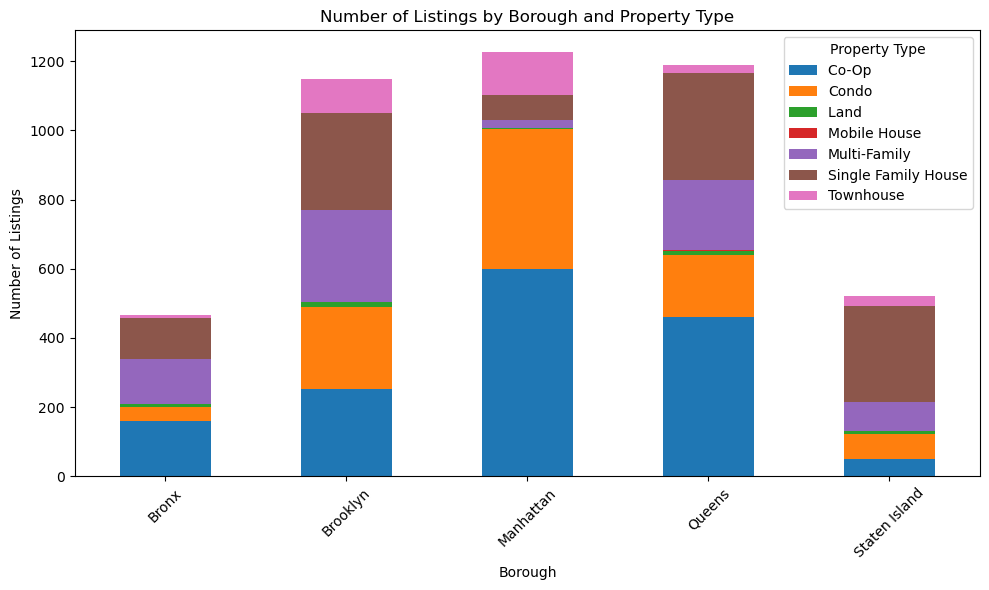

In [50]:
borough_property_counts2.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Borough and Property Type')
plt.legend(title='Property Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show

In [ ]:
#Stacked bar chart above showing the total number of listings, but also how the different property types differentiate.

## Creating a Histogram

In [ ]:
#Histograms specialize in showing Distribution. 
#Distribution I want to show is the number of listings on the y axis. 
#Bins of different mortgage price ranges on the x axis. 
#May categorize by bed rooms to have more similar ranges, less total bins

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
DF5 = pd.read_excel(r'/Users/winsontom/Desktop/03 Scripts & Data/6.0 - Visualizations/Histogram_Data.xlsx')

In [3]:
DF5

,Address,Property Type,Beds,Total Payments
0,"2 E 55th St Unit 803New York, NY 10022",Condo,2,3019.96
1,Central Park Tower Penthouse-217 W 57th New Yo...,Condo,7,1250655.78
2,"620 Sinclair AveStaten Island, NY 10312",Single Family House,4,3367.27
3,"2 E 55th St Unit 908W33Manhattan, NY 10022",Condo,3,1042.47
4,"5 E 64th StNew York, NY 10065",Townhouse,7,352896.25
...,...,...,...,...
4549,"222 E 80th St Apt 3AManhattan, NY 10075",Co-op,1,4001.13
4550,"97-40 62 Dr Unit LgRego Park, NY 11374",Co-op,1,1731.08
4551,"427 W 21st St Unit GardenNew York, NY 10011",Co-op,1,8336.02
4552,"91-23 Corona Ave Unit 4GElmhurst, NY 11373",Condo,2,3995.52


In [6]:
DF5_2 = DF5[DF5['Beds']==2]

In [7]:
#This data frame of DF5 shows properties with 2 bedrooms and their subsequent monthly payments

DF5_2

,Address,Property Type,Beds,Total Payments
0,"2 E 55th St Unit 803New York, NY 10022",Condo,2,3019.96
6,"157 W 126th St Unit 1BNew York, NY 10027",Condo,2,6768.11
9,"1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",Co-op,2,3821.53
10,"800 Grand Concourse Apt 2JSBronx, NY 10451",Co-op,2,3404.71
13,"91-15 Lamont Ave Unit 6DElmhurst, NY 11373",Co-op,2,3357.40
...,...,...,...,...
4535,"49 N 8th St Apt 6EBrooklyn, NY 11249",Condo,2,16191.42
4537,"97-52 75th St Unit B42Ozone Park, NY 11416",Condo,2,2397.99
4546,"700 Park Ave Unit 20ANew York, NY 10021",Co-op,2,12664.51
4547,2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...,Condo,2,6219.88


In [21]:
#Ensuring the X axis shows as currency $ values

def currency(x, pos):
    return f'${x:,.0f}'

formatter = FuncFormatter(currency)

In [25]:
#Create bins from $0 to $105,000 with $5k intervals
bins = np.arange(0, 105000, 5000)

<function matplotlib.pyplot.show(close=None, block=None)>

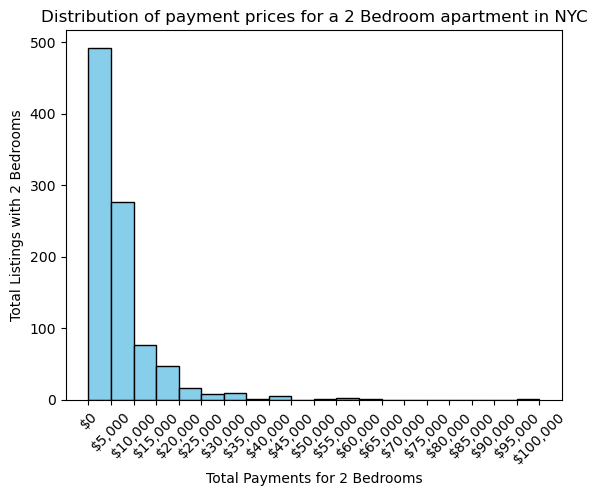

In [38]:
plt.hist(DF5_2['Total Payments'], bins=bins, edgecolor='black', color='skyblue')

plt.xlabel('Total Payments for 2 Bedrooms')
plt.ylabel('Total Listings with 2 Bedrooms')
plt.title('Distribution of payment prices for a 2 Bedroom apartment in NYC')

plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(bins, rotation=45)
  
plt.show

In [39]:
plt.savefig('Python_histogram.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>